# Practical 7:
> ## Implement Maximum Likelihood Function

Submitted By:
- Aman Kumar
- 2019UCO1634
- CoE - 2

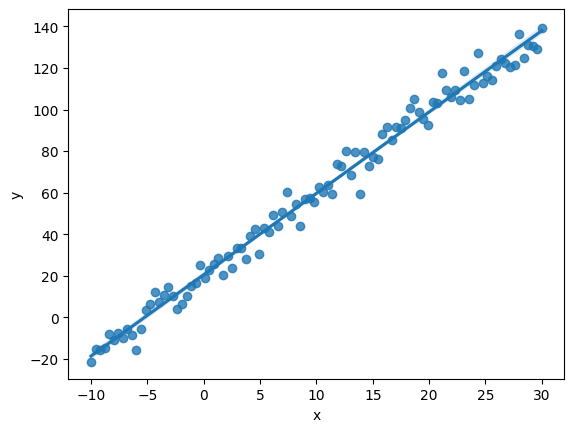

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels import api
from scipy import stats
from scipy.optimize import minimize

# create an independent variable 
x = np.linspace(-10, 30, 100)
e = np.random.normal(10, 5, 100)
y = 10 + 4*x + e

df = pd.DataFrame({'x':x, 'y':y})
# visualize data distribution
sns.regplot(x='x', y='y', data = df)
plt.show()

We first implement an (Ordinary Least Squares) OLS model on the dataset and find benchmark values of model parameters. These values include intercept, regression coeffecient and standard deviation. We then compare them to the MLE results. 

In [ ]:
features = api.add_constant(df.x)
model = api.OLS(y, features).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     7069.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           3.70e-93
Time:                        19:25:04   Log-Likelihood:                -310.14
No. Observations:                 100   AIC:                             624.3
Df Residuals:                      98   BIC:                             629.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.4888      0.716     28.627      0.000      19.068      21.909
x              3.9167      0.047     84.075      0.000       3.824       4.009
==============================================================================
Omnibus:                        0.341   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.843   Jarque-Bera (JB):                0.069
Skew:                           0.021   Prob(JB):                        0.966
Kurtosis:                       3.121   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# find the std dev
res = model.resid
standard_dev = np.std(res)
standard_dev

5.378790053453043

Results from OLS are: 20.4888, 3.9167, 5.3787

In [ ]:
def MLE_Norm(parameters):
  const, beta, std_dev = parameters
  pred = const + beta*x

  LL = np.sum(stats.norm.logpdf(y, pred, std_dev))
  neg_LL = -1*LL
  return neg_LL

mle_model = minimize(MLE_Norm, np.array([2,2,2]), method='L-BFGS-B')
mle_model

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 310.14019849676805
        x: [ 2.049e+01  3.917e+00  5.379e+00]
      nit: 28
      jac: [ 5.684e-05  1.023e-04 -5.684e-05]
     nfev: 132
     njev: 33
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>

MLE Results are: 20.49, 3.917, 5.379

> Hence, MLE results have matched OLS results

> The parameters are also optimised. 